# INFO 370 PS4
*Name: Brian Park*

In [759]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Is poverty in Azraq refugee camp falling?

### 1.1 Background (2pt)

1. (1pt) What was the abject poverty in Azraq camp in Q1 and Q2 2022 (when including all assistance)? Lets call these variables p1 and p2.
2. (1pt) How many households were surveyed in the camp? Call this sample size S.

In [760]:
#1.1-1
p1 = 0.66 #Q1
p2 = 0.51 #Q2

In [761]:
#1.1-2
S = 650 #total households surveyed in the camp

### 1.2 Simulations

1. (2pt) Create a random sample using the correct values of S and p2 you found in 1.1 above.
2. (2pt) Compute the sample mean and compare it with p1 and p2 above. How close is it to these figures?
3. (1pt) Pick your number of replications R (something like 1000 or 10,000 are good numbers).
4. (5pt) Repeat the points 1 and 2 for R times: create the sample, compute the average, but also store the average in an array. You should have R averages now.
5. (5pt) What is the average of the averages? Which probability from 1 does it resemble? Why?
6. (4pt) Plot a histogram of the averages. Which distribution does it resemble? What do you say, by just eyeballing the plot, what are the largest and smallest values that are “reasonably” common?
7. (6pt) Finally, compute 2.5th and 97.5th percentile and the 95% confidence intervals. Does the Q1 poverty value fall into this interval?

In [762]:
#1.2-1
S2 = np.random.binomial(1, p2, S) #Sample 2

In [763]:
#1.2-2
mS2 = np.mean(S2) #sample mean of S2
(mS2, p1, p2)

(0.5046153846153846, 0.66, 0.51)

The computed sample mean is fairly close to p2 but not close to p1.

In [764]:
#1.2-3
R = 1000 #Repeat 1000 times

In [765]:
#1.2-4
def rep(S, p, arr):
    for i in range(R):
        x = np.random.binomial(1, p, S)
        arr.append(np.mean(x)) #compute the average and store it in an array
    return arr

In [766]:
#1.2-4-p2
arr = []
arr2 = rep(S, p2, arr)

In [767]:
#1.2-5
np.mean(arr2) #average of the averages

0.5103384615384615

The average of `arr2` resembles p2.

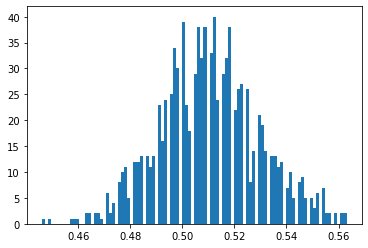

In [793]:
#1.2-6-arr2
_ = plt.hist(arr2, bins = 100)

This histogram fairly resembles a normal distribution. The smallest values are commonly distributed around 0.46 while the largest values are commonly distributed around 0.56.

In [769]:
#1.2-7-arr2-percentile
np.percentile(arr2, 2.5), np.percentile(arr2, 97.5)

(0.47384615384615386, 0.5507692307692308)

The Q1 poverty value - 0.66 - does not fall into the interval above.

### 1.3 Theoretical CI

1. (3pt) Compute variance of your sample of X. You can use the Bernoulli variance formula Var X = p(1 − p). You can also use the sample you created in 1.2.1, or create a new sample, and find the sample variance.
2. (6pt) But this was variance of X (or sample variance if that was what you computed). What we need is variance of sample mean. What does CLT tell about relationship b/w sample variance and variance of the sample mean?
3. (6pt) Compute the standard deviation of sample mean using CLT.
4. (3pt) Compare the standard deviation you got here with the standard deviation of the sample of averages you computed in 1.2.4.
5. (7pt) Use this standard deviation to compute the confidence interval. Compare it to what you got in 1.2.7. Does p1 falls inside or outside of this interval? You may want to check Lecture Notes 1.5.2 “Doing Statistical Inference”. Hint: they should be fairly similar, and your conclusion regarding p1 should be the same.

In [770]:
#1.3-1
VarS2 = np.var(S2)
VarS2

0.24997869822485208

In [771]:
#1.3-2

CLT tells how the variance of the sample mean changes with the sample size S. As sample size S increases, the variance of sample mean decreases based on the formula - `VarX / S`. Also, CLT tells how sample variance affects to compute the confidence interval.

In [772]:
#1.3-3
SD2 = np.sqrt(VarS2) / np.sqrt(S)
SD2

0.019610777971656775

In [773]:
#1.3-4
(SD2, np.std(arr2))

(0.019610777971656775, 0.019243294382673276)

The standard deviation with CLT is fairly close to the standard deviation of the sample of averages.

In [795]:
#1.3-5-S2-CI
mS2 - (1.96 * SD2), mS2 + (1.96 * SD2)

(0.4661782597909373, 0.5430525094398319)

The confidence interval computed above is fairly close to the interval computed in 1.2.7. p1 falls outside the confidence interval computed above.

## 2 How smooth are normal cells?

### 2.1 Descriptive analysis

1. (1pt) Load data. How many cases and variables do you have?
2. (3pt) Separate the variable smoothness mean. It measures the roundness (smoothness) of cells in biopsy samples. In this question this is the only variable you need. Does it contain any missing values? How many valid values it contains? (We’ll denote this number by S.)
3. (2pt) Describe the variable. What are it’s mean (we’ll call it µ below) and standard deviation (call it σ below)? Hint: you should see numbers 0.096 and 0.014.
4. (2pt) Plot its histogram. Which distribution does it resemble?

In [775]:
#2.1-1
df = pd.read_csv("../data/wdbc.csv.bz2", sep = ",")
df

,id,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


The data has 569 cases and 32 variables.

In [776]:
#2.1-2
dfSM = df["smoothness.mean"]
dfSM

0      0.11840
1      0.08474
2      0.10960
3      0.14250
4      0.10030
        ...   
564    0.11100
565    0.09780
566    0.08455
567    0.11780
568    0.05263
Name: smoothness.mean, Length: 569, dtype: float64

In [816]:
#2.1-2
dfSM.isna().sum()

0

It does not contain any missing values.

In [817]:
#2.1-2
S = dfSM.notnull().sum()
S

569

It contains 569 valid values.

In [779]:
#2.1-3
mu = np.mean(dfSM) #mean
sigma = np.std(dfSM) #standard deviation
mu, sigma

(0.096360281195079, 0.014051764066591201)

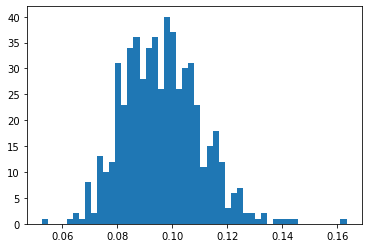

In [798]:
#2.1-4
_ = plt.hist(dfSM, bins = 50)

This histogram fairly resembles the normal distribution.

### 2.2 Test the hypothesis: simulations

1. (1pt) Pick your number of simulations R (1000 or more)
2. (1pt) Create S random normally distributed simulated smoothnesses using the same mean and standard deviations you computed above in Q 2.1. Hint: you can create random normals with given mean µ and standard deviation σ along the lines mu=1 sigma=0.1 np.random.normal(mu, sigma, size=5)
3. (1pt) Compute mean of your simulated numbers. Is it close to the true value µ (the mean you computed in 2.1.?? above)? Is it close to the H0 value? Explain!
4. (3pt) Now repeat the last two points (2 and 3) R times. Each time store the mean. As a result you should have R simulated mean cell smoothnesses.
5. (3pt) Compute mean of the means you simulated in the previous point (we’ll call it µ ∗ below). Which number do you get? Is it similar to the actual mean in data, or to the claim? Explain!
6. (2pt) Make a histogram of your simulated means. Which distribution does it resemble? Why?
7. (2pt) Compute standard deviation of your simulated means.
8. (4pt) Compute 95% confidence intervals for your simulated means. Hint: just use np.percentile or np.quantile
9. (3pt) What is your conclusion based on simulations–is H0 compatible with data? Can you reject H0?

In [781]:
#2.2-1
R = 1000
R

1000

In [800]:
#2.2-2
SN = np.random.normal(mu, sigma, S)

In [801]:
#2.2-3
np.mean(SN)

0.09597894273989228

The mean of my simulated numbers is more close to the true value µ because the mean smoothness in hypothesis is 0.093 while the true value µ is 0.09636.

In [806]:
#2.2-4
arr = []
def rep(arr):
    for i in range(R):
        x = np.random.normal(mu, sigma, S)
        arr.append(np.mean(x))
    return arr
SM = rep(arr)

In [808]:
#2.2-5
muHat = np.mean(SM)
muHat

0.09636750616295366

The mean of means I computed above is 0.09636750616295366 and still similar to the true/actual value µ because the mean smoothness in hypothesis is smaller than the true value µ.

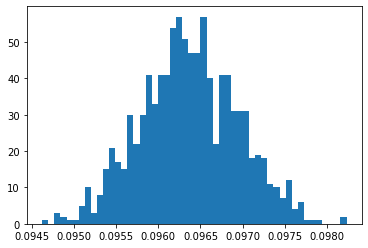

In [809]:
#2.2-6
_ = plt.hist(SM, bins = 50)

The histogram above resembles normal distribution because the sample could be drawn from the normal distribution by using `np.random.normal` whose mean value is commonly distributed around µ.

In [810]:
#2.2-7
np.std(SM) #standard deviation of my simulated means

0.0005765110982357454

In [811]:
#2.2-8
np.percentile(SM, 2.5), np.percentile(SM, 97.5)

(0.09526013161213463, 0.09751460853282674)

In [789]:
#2.2-9

Since H0 - 0.093 - does not fall into the confidence interval computed above, we reject the claim at 95% confidence interval that the mean smoothness is 0.093.

### 2.3 Test hypothesis: t-test

1. (9pt) Compute the confidence interval of the sample mean without simulations, using just µ and σ. Do you get a similar result as in 2.2.??? Hint: check out Lecture Notes 1.5.2 “Doing Statistical Inference”.
2. (9pt) Often we are not interested in CI but instead just the reject/do not reject decision. Compute the t-value. Will you reject H0 based on it? Hint: you need to compare it with the critical t value. Consult Openintro Stats 5.2 and 5.3. Note: OIS uses Z-values in that place. It is basically the same thing, but there are slight differences in terms of what exactly do you assume.
3. (2pt) Write your conclusion: do both methods–simulations and t-test agree on rejecting/not rejecting the H0?

In [812]:
#2.3-1
(mu - (1.96 * sigma)), (mu + (1.96 * sigma))

(0.06881882362456025, 0.12390173876559775)

The result above is not similar to the result in 2.2. It has a broader confidence interval compared to the previous one. The conclusion with this interval has a more chance to fail to reject the claim.

In [815]:
#2.3-2
t = (mu - 0.093) / (sigma/np.sqrt(S))
t

5.704280924336899

Since t-value is greater than criticial t value at 95% confidence level - 1.96, we reject H0.

In [792]:
#2.3-3

Based on the results, both methods of simulations and t-test reject the H0 since H0 did not fall into the 95% confidence interval and computed t-value is greater than the criticial t value.

#### How many hours did you spend on this PS?

I spent 7 hours on this PS.